# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mat

# Loading the dataset

In [2]:
# giving the variable name:

data = pd.read_csv("C:/Users/dk957/Downloads/zomato.csv", encoding='ISO-8859-1')

In [3]:
#loading the country_dataset and giving variable:

country_data = pd.read_excel("C:\\Users\\dk957\\Downloads\\Country-Code.xlsx")

In [4]:
# Merging two datasets on comman column country code:

data = pd.merge(data,country_data,on="Country Code",how="left")

In [5]:
#Setting up to show all columns of dataframe

pd.set_option("display.max_columns",None)

In [6]:
#showing each column along with it's corresponding count of unique values

data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

## Plotting the null values heatmap:

<AxesSubplot:>

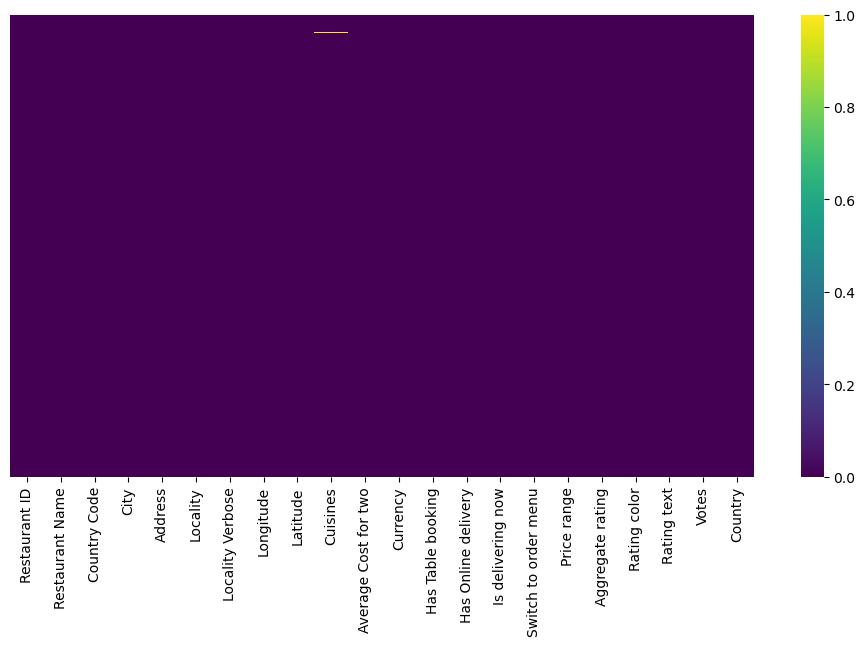

In [113]:
sns.heatmap(data.isna(), yticklabels = False,cmap='viridis',cbar=True)

In [8]:
# Checking the count of unique values in Country column:
country_names = data.Country.value_counts().index
country_count = data.Country.value_counts().values

## Creating a pie chart to visualize countries with their counts:

([<matplotlib.patches.Wedge at 0x1ee2de91d60>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.4%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.7%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.9%')])

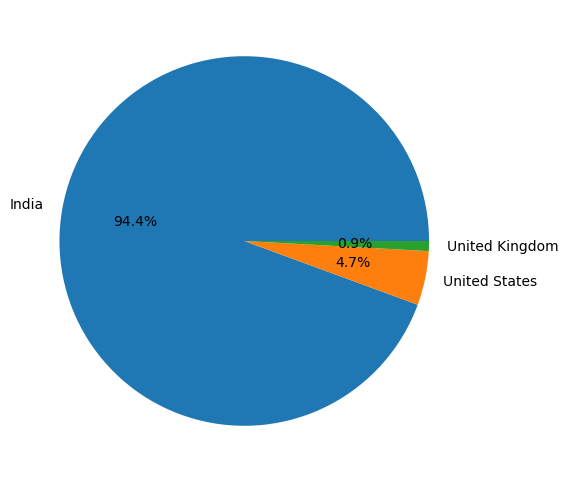

In [114]:
plt.pie(x=country_count[:3],labels=country_names[:3],autopct='%.1f%%')

Observation:
1. Zomato has most number of transations from India(94.4%), United States(4.7%) and United Kingdom(0.9%)

## Grouping the data with rating columns to find out more relations:

In [115]:
rating_count = data.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns={0:"count"})

rating_count

,Aggregate rating,Rating color,Rating text,count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Observation:
1. 0.0 rating refers to no ratings given by customers
2. 1.8 to 2.4 rating referes to poor
3. 2.5 to 3.4 rating refers to average
4. 3.5 to 3.9 rating refers to good
5. 4.0 to 4.4 rating refers to very good
6. 4.5 to 4.9 rating refers to excellent

In [116]:
#increasing the size of the plot:

mat.rcParams['figure.figsize'] = (12,6)

## Visualizing the count of each rating:

<AxesSubplot:xlabel='Aggregate rating', ylabel='count'>

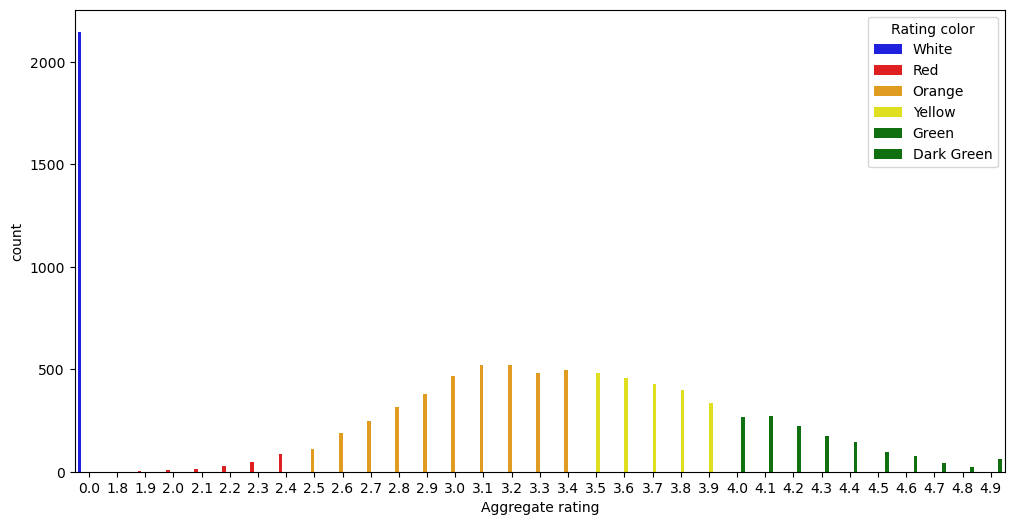

In [117]:
sns.barplot(x=rating_count["Aggregate rating"],y=rating_count["count"],hue="Rating color",data=rating_count,palette=(["Blue","Red","Orange","Yellow","Green","Green"]))

Observation:
1. 0.0 rating count is very high
2. Maximum number of ratings are between 2.5 to 3.4 belongs to Average

## Creating a countplot for each rating:

C:\Users\dk957\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating color', ylabel='count'>

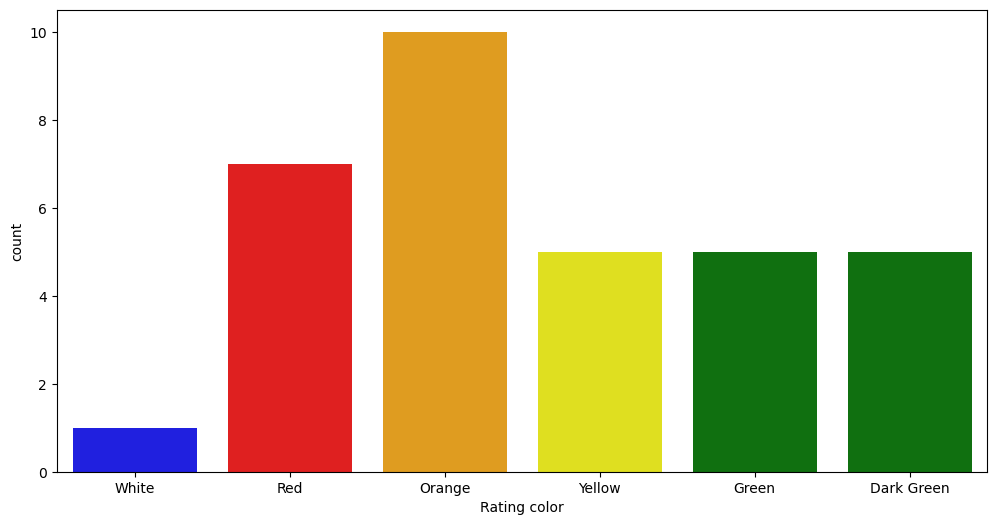

In [119]:
sns.countplot(rating_count["Rating color"],data=rating_count,palette=(["Blue","Red","Orange","Yellow","Green","Green"]))

In [60]:
## Finding the country names that have given 0 ratings:

country_zero_rating= data[data["Aggregate rating"]==0.0].reset_index().groupby(["Aggregate rating","Country"]).size().reset_index().rename(columns={0:"count"}).sort_values(["count"],ascending=False)

country_zero_rating

,Aggregate rating,Country,count
1,0.0,India,2139
0,0.0,Brazil,5
3,0.0,United States,3
2,0.0,United Kingdom,1


<AxesSubplot:xlabel='Country', ylabel='count'>

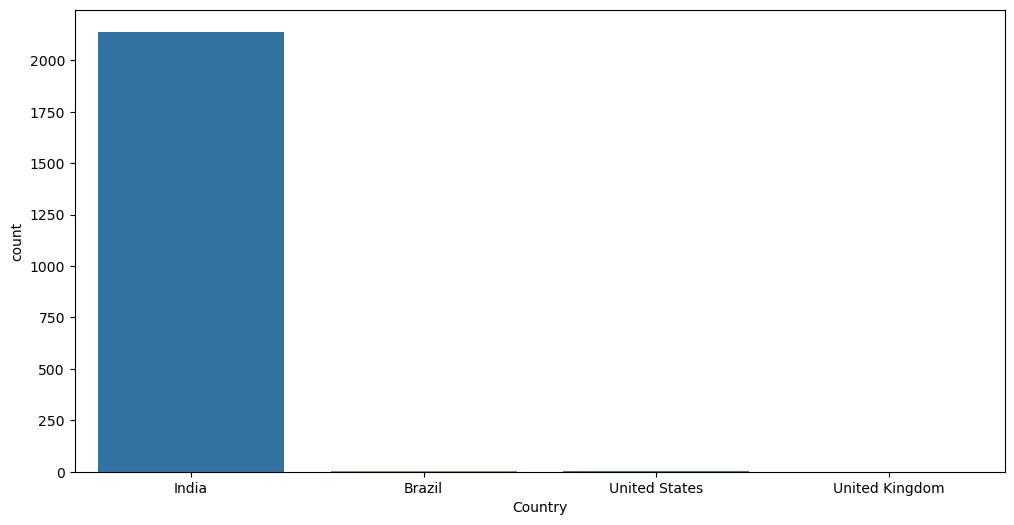

In [64]:
#Visualizing the country counts with 0 rating:

sns.barplot(x=country_zero_rating["Country"],y=country_zero_rating["count"],data=country_zero_rating)

Observation:
1. Most of the no ratings are given by Indian Customers.

In [68]:
# Finding which currency is used by which country:

country_currency = data.groupby(["Country","Currency"]).size().reset_index().

country_currency

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [73]:
# Finding out which countries have online deliveries:

country_online_delivery = data[data["Has Online delivery"]=="Yes"].groupby(["Country","Has Online delivery"]).size().reset_index().rename(columns={0:"count"})

country_online_delivery

,Country,Has Online delivery,count
0,India,Yes,2423
1,UAE,Yes,28


Observation:
1. Only India and UAE have Online Delivery Options

([<matplotlib.patches.Wedge at 0x1ee2b054820>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

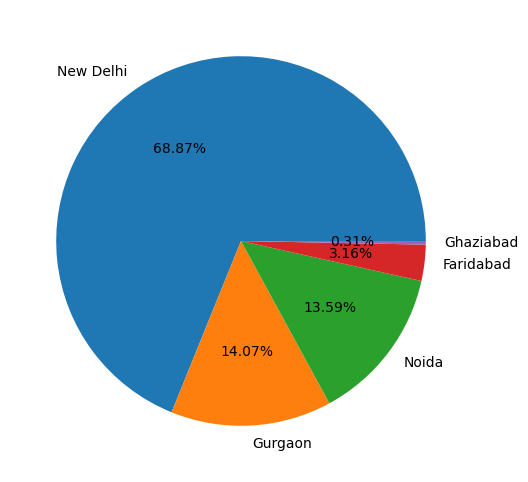

In [91]:
#visualizing the transaction bases on city disytibution:

values=data["City"].value_counts().values
labels=data["City"].value_counts().index

plt.pie(x=values[:5],labels=labels[:5],autopct="%.2f%%")

Observation:
1. Maximum number of transactions happened from Delhi (68.87%).

In [97]:
# Finding the top 10 cusines:

top_10_cuisines = data[["Country","Cuisines"]].groupby("Cuisines").size().reset_index().rename(columns={0:"count"}).sort_values(["count"],ascending=False).head(10)

top_10_cuisines

,Cuisines,count
1306,North Indian,936
1329,"North Indian, Chinese",511
497,Chinese,354
828,Fast Food,354
1514,"North Indian, Mughlai",334
331,Cafe,299
177,Bakery,218
1520,"North Indian, Mughlai, Chinese",197
186,"Bakery, Desserts",170
1749,Street Food,149


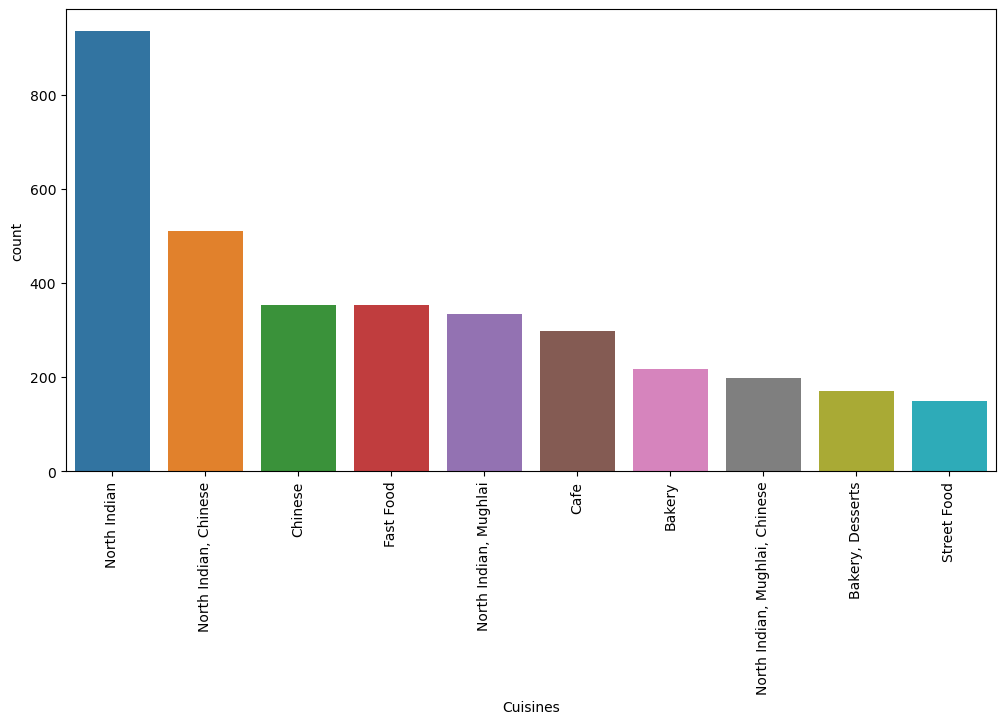

In [111]:
# Visualizing the top 10 Cusinies:


sns.barplot(x=top_10_cuisines["Cuisines"],y=top_10_cuisines["count"],data=top_10_cuisines)

#rotating x labels for better view:
plt.xticks(rotation=90)

plt.show()

Observation:
1. Most famous cusine is North Indian

# Conclusion:

1. Zomato has most number of transations from India(94.4%), United States(4.7%) and United Kingdom(0.9%):
   Focus to implement the services in other countries is required to improve the business.
   
2. 0.0 rating count is very high:
   Sales and promotional team needs to motivate the customer to give their valuable rating.

3. Maximum number of ratings are between 2.5 to 3.4 belongs to Average:
   Needs to focus on service quality to improve the ratings.

4. Most of the no ratings are given by Indian Customers:
   Indian customer should be given special perks for providing their valuable rating.

5. Only India and UAE have Online Delivery Options:
   Online delivery options need to be provided in other countries in order to improve the business.

6. Maximum number of transactions happened from Delhi (68.87%):
   Number of transactions from a city also depends on it's population. However, it can be increased by providing more offers.

7. Most famous cusine is North Indian:
   More focus and food quality should be given to North Indian food, so it can become more famous.